<a href="https://colab.research.google.com/github/val93s/Machine_learning/blob/main/Copy_of_11_7_2_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.7.2 Activity

Breast Cancer Detection

According to the <a href="https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html">American Cancer Society (n.d.)</a>, breast cancer is the second-most common type of cancer diagnosed in American women, behind only skin cancers. The average risk of an American woman developing breast cancer sometime in her life is about 13%. This means there is a 1 in 8 chance she will eventually develop breast cancer.

Mammograms are used to detect breast cancer—hopefully at an early stage. However, many masses that appear on a mammogram are not actually cancerous. Developing a machine learning model to predict whether a tumor is benign or cancerous would be helpful for physicians as they guide and treat patients.

In this module, you'll use two new ensemble methods—GradientBoost and AdaBoost—to classify the tumors as either benign or malignant. You'll determine if this model does a better or worse job classifying the tumors compared to previous models tried.  

#Step 1: Download and Save the `cancer.csv` Data Set from the Class Materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `cancer.csv` Data Set by Running the Following Code Block 

* When prompted, navigate to and select the `cancer.csv` data set where you saved it on your computer.

In [ ]:
#Step 2

from google.colab import files
cancer = files.upload()

Saving cancer (1).csv to cancer (1).csv


#Step 3: Import the Necessary Packages
Import the following packages:
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
```

In [ ]:
#Step 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier



# Step 4: Create a Pandas Dataframe from the CSV File
* Name the dataframe `cancer`.
* Print the first five observations of `cancer`. Note the types of data the file contains.

In [ ]:
#Step 4
cancer= pd.read_csv('cancer.csv')
cancer.head()





,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


#Step 5: Convert the Variable `Diagnosis` into a Numeric Data Type  
* There are many ways to accomplish this, but you may choose to work with the example shown below: 

```
cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0

```
* Name the result `cancer_present` and code the malignant tumors with a `1` and the benign tumors with a `0`.






In [ ]:
#Step 5
cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0




#Step 6: Split the Data into the Target Variable and the Feature of Interest
* The goal is to predict whether a tumor is benign or malignant (`cancer_present`) using the mean tumor perimeter measure (`perimeter_mean`).
* Select all of the features of the cancer dataframe **except** `id`, `diagnosis`, and `cancer_present`. Name the resulting dataframe `X`.
* Select the column `cancer_present` from the cancer dataframe and name it `y`. Make sure `y` is also a dataframe and not a series.

In [ ]:
#Step 6
y = cancer['cancer_present']

X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883


#Step 7: Split the Data into a Training Data Set and a Test Data Set
* Use `train_test_split` from `sklearn.model_selection`.
* Name the X training/validation set `X_train` and the y training/validation set `y_train`.
* Name the X test set `X_test` and the y test set `y_test`.
* Set `test_size = 0.25` and `random_state = 42` 






In [ ]:
#Step 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#Step 8: Build and Evaluate a Pipeline That Will Impute and Standardize the Data and Fit the AdaBoost Boosting Classifier with the Default Hyperparameters
* The first step should be `SimpleImputer(missing_values=np.nan, strategy='mean'))`.
* The second step should be `StandardScaler()`.
* The third step should be `AdaBoostClassifier(random_state=42)`.  
* Name the pipeline `AdaBoost`.
* Fit the pipeline to `X_train` and `Y_train`.
* Calculate and print the accuracy of each of the five models using `scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)`.
* Calculate and print the mean and standard deviation (SD) of the accuracy measures returned from cross-validation.






In [ ]:
#Step 8
Adaboost = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('ada', AdaBoostClassifier(random_state=42))])

Adaboost.fit(X_train, y_train)

scores = cross_val_score(Adaboost, X_train, y_train, cv=10)

print(scores.mean())



0.9200996677740865


#Step 9: Build and Evaluate a Pipeline That Will Impute and Standardize the Data and Fit the GradientBoost Boosting Classifier with the Default Hyperparameters
* The first step should be `SimpleImputer(missing_values=np.nan, strategy='mean'))`.
* The second step should be `StandardScaler()`.
* The third step should be `GradientBoostingClassifier(random_state=42)`.  
* Name the pipeline `GradientBoost`.
* Fit the pipeline to `X_train` and `Y_train`.
* Calculate and print the accuracy of each of the five models using `scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)`.
* Calculate and print the mean and SD of the accuracy measures returned from cross-validation.






In [ ]:
#Step 9
GradientBoost = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('Gradient', GradientBoostingClassifier(random_state=42))])

GradientBoost.fit(X_train, y_train)

scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)

print(scores.mean())


0.9413621262458471


#Step 10: Determine Which Boosting Algorithm Was Most Accurate

**Step 10 Answer:**



#Step 11: Given That for GradientBoost the Accuracy Also Depends Largely on the Values Selected for the Hyperparameters, Determine How Changing the Learning Rate Changes the Model Accuracy
* Run the code block below to model the data.
* Which learning rate produces the most accurate model?






   learning rate  mean accuracy
0            0.1      94.136213
1            0.2      93.903654
2            0.3      93.433001
3            0.4      93.427464
4            0.5      92.480620


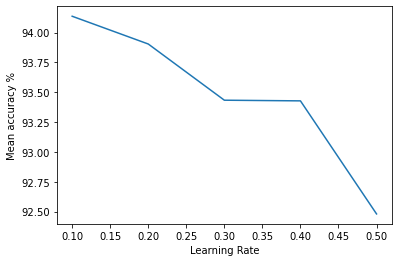

In [ ]:
#Step 11

mean_accuracy = []

for i in [0.10, 0.20, 0.30, 0.40, 0.50]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.10, 0.20, 0.30, 0.40, 0.50])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

**Step 11 Answer:**



#Step 12: Evaluate the Model Using the Test Set  
* This is the end of the model-building process for the breast cancer data. The current best-fitting model is the GradientBoost Classifier with a learning rate of .1 (which is the defaut learning rate).
* Calculate the model accuracy for the test set using `GradientBoost.score(X_test, y_test)`.
* Does the model still perform well on the new data?

In [ ]:
#Step 12
print(GradientBoost.score(X_test, y_test))


0.9440559440559441


**Step 12 Answer:**

